1. age - age in years
1. sex - (1 = male; 0 = female)
1. cp - chest pain type
0 Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
1. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
1. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
1. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
1. restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
1. thalach - maximum heart rate achieved
1. exang - exercise induced angina (1 = yes; 0 = no)
1. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
1. slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
1. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
1. thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
1. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, 'Amount')

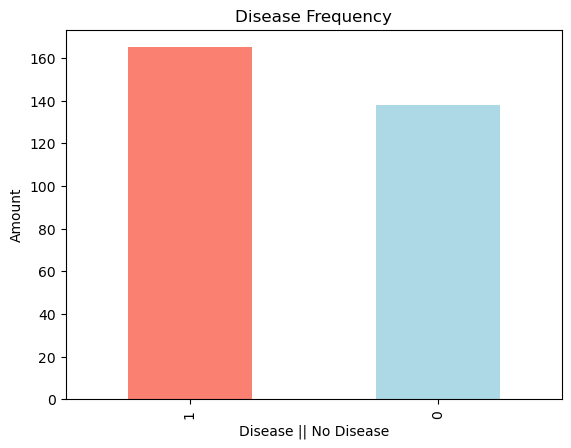

In [4]:
# Plotting the target column

df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

plt.title("Disease Frequency")
plt.xlabel("Disease || No Disease")
plt.ylabel("Amount")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

Text(0, 0.5, 'Amount')

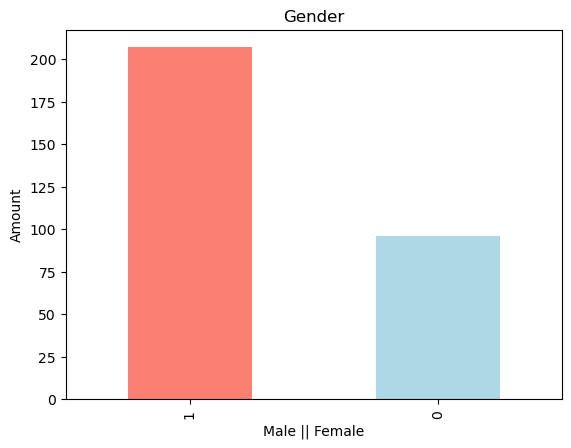

In [8]:
# Gender comparison

df["sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

plt.title("Gender")
plt.xlabel("Male || Female")
plt.ylabel("Amount")

In [9]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


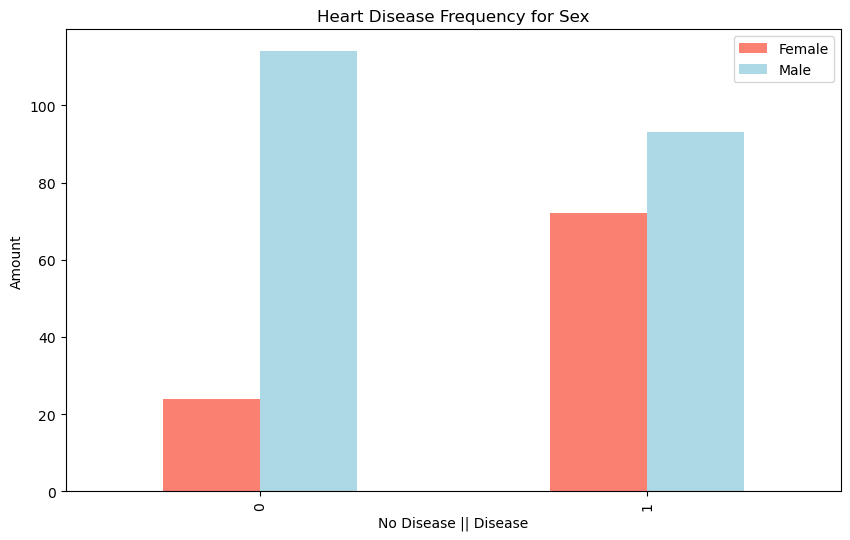

In [10]:
# Comparing Gender with Target

pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("No Disease || Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

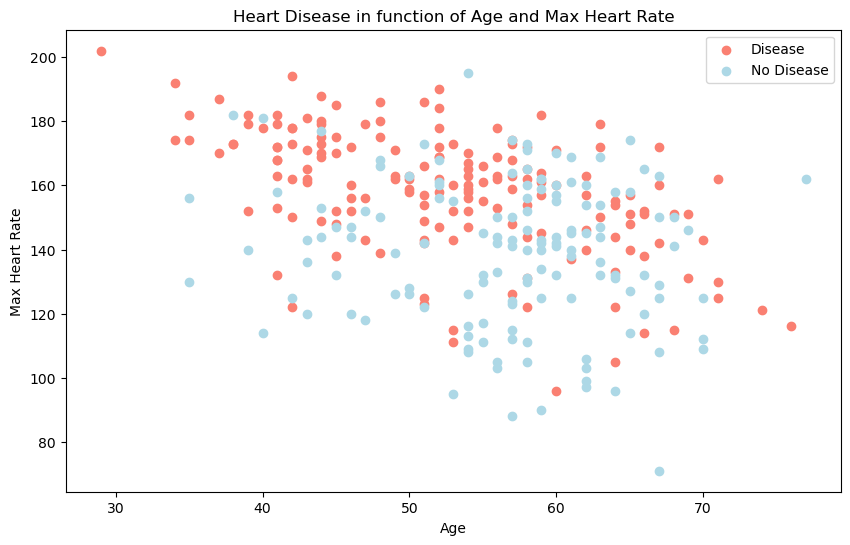

In [11]:
# Comparing Age with Max Heart Rate

plt.figure(figsize=(10, 6))

plt.scatter(df["age"][df["target"] == 1],
            df["thalach"][df["target"] == 1],
            c="salmon")

plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"] == 0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

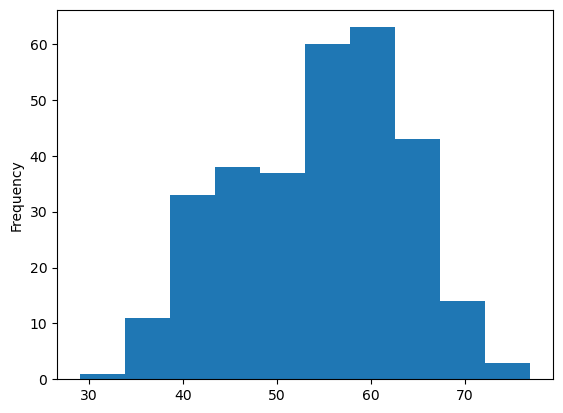

In [12]:
# Age Distribution

df["age"].plot.hist()

In [13]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

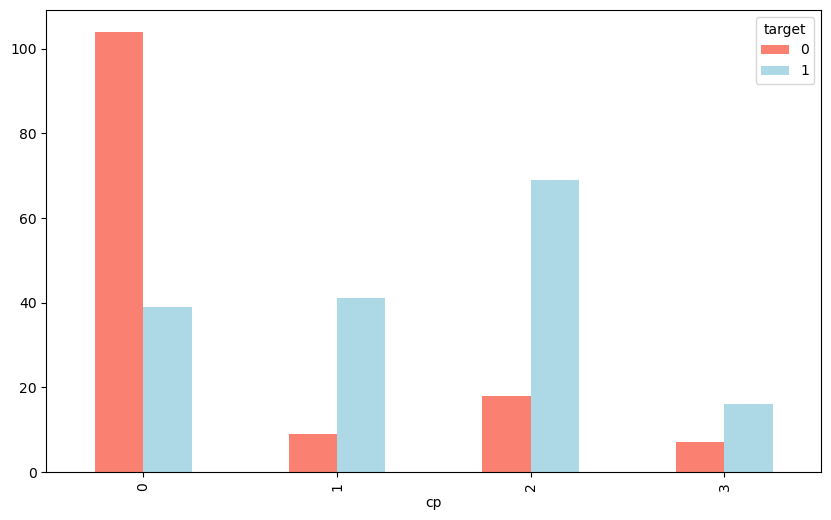

In [14]:
# Comparing Chest Pain with Target

pd.crosstab(df["cp"], df["target"]).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

In [15]:
X = df.drop("target", axis=1)
y = df["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.8032786885245902

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = metrics.auc(fpr, tpr)

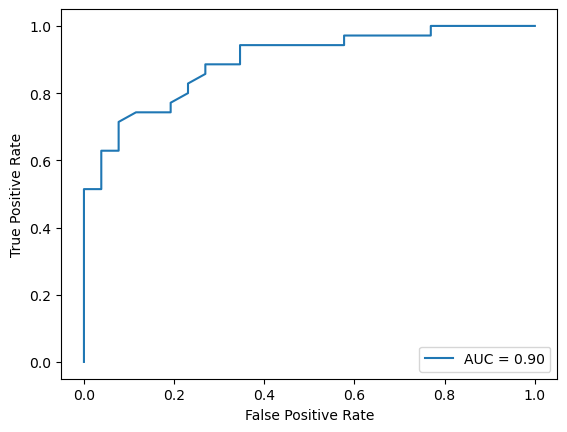

In [19]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Text(95.72222222222221, 0.5, 'Predicted Label')

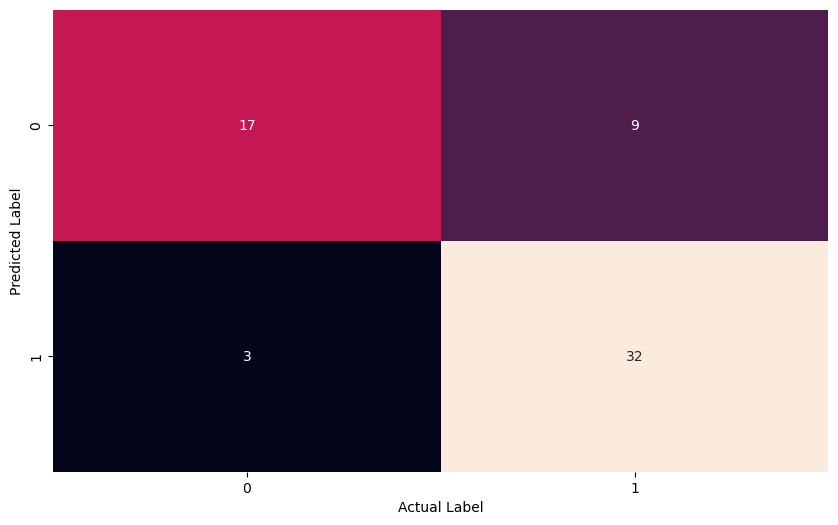

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)

plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")